# MACHINE LEARNING

### Exploring the molecular potential of natural products against COVID-19 through molecular modeling and machine learning

#### 1 - Load Data

It deals with a dataset of natural products taken from the LOTUS platform

In [1]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df

,index,index_base_lotus,smiles,inchi,inchi2D,id,smiles2D,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,7P2G,categoria
0,70000,105285,COc1ccc(/C=C/C(=O)O[C@@H]2[C@@H](OC(C)=O)[C@@H...,InChI=1S/C29H39NO6/c1-18-15-21-22-7-5-13-30-14...,InChI=1S/C29H39NO6/c1-18-15-21-22-7-5-13-30-14...,LTS0107979,COc1ccc(C=CC(=O)OC2C(OC(C)=O)C3CC(C)CC45C3CCCN...,13.177236,-0.424904,13.177236,...,0,0,0,0,0,0,0,0,-2.6,Pouca Afinidade
1,70001,105287,C#CC#CCC/C=C/C=C\C(O)=NCCc1ccccc1,InChI=1S/C19H19NO/c1-2-3-4-5-6-7-8-12-15-19(21...,InChI=1S/C19H19NO/c1-2-3-4-5-6-7-8-12-15-19(21...,LTS0155960,C#CC#CCCC=CC=CC(O)=NCCc1ccccc1,9.584664,0.044171,9.584664,...,0,1,0,0,0,0,1,0,-5.0,Pouca Afinidade
2,70002,105288,COc1ccc(CC(C)=O)cc1OC,InChI=1S/C11H14O3/c1-8(12)6-9-4-5-10(13-2)11(7...,InChI=1S/C11H14O3/c1-8(12)6-9-4-5-10(13-2)11(7...,LTS0164502,COc1ccc(CC(C)=O)cc1OC,10.895183,0.136315,10.895183,...,0,0,0,0,0,0,0,0,-4.7,Pouca Afinidade
3,70003,105289,CC1(C)CCC[C@]2(C)[C@H](OC(=O)/C=C\c3ccc(O)cc3)...,InChI=1S/C24H32O5/c1-22(2)12-5-13-23(3)20(17-1...,InChI=1S/C24H32O5/c1-22(2)12-5-13-23(3)20(17-1...,LTS0099131,CC1(C)CCCC2(C)C(OC(=O)C=Cc3ccc(O)cc3)C3COC(O)C...,12.730077,-0.807463,12.730077,...,0,0,0,0,0,0,0,0,-5.5,Potencial
4,70004,105290,C=C1[C@H]2CC[C@@]3(CC[C@@H]4C5(C)CCC[C@@]4(CN4...,InChI=1S/C22H33NO2/c1-14-15-4-8-21(18(14)24)9-...,InChI=1S/C22H33NO2/c1-14-15-4-8-21(18(14)24)9-...,LTS0233409,C=C1C2CCC3(CCC4C5(C)CCCC4(CN4CCOC45)C3C2)C1O,11.251758,-0.235130,11.251758,...,0,0,0,0,0,0,0,0,-6.5,Alta Afinidade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111801,117596,177036,C=C1CC(OC(=O)C(C)(CCl)OC(C)=O)C2C(=C)C(=O)OC2C...,"InChI=1S/C23H27ClO8/c1-10-7-17(30-22(28)23(6,9...","InChI=1S/C23H27ClO8/c1-10-7-17(30-22(28)23(6,9...",LTS0076981,C=C1CC(OC(=O)C(C)(CCl)OC(C)=O)C2C(=C)C(=O)OC2C...,12.935668,-1.693236,12.935668,...,0,0,0,0,0,0,0,0,-5.6,Potencial
111802,117597,177037,CCCCCCCCCCCCCC=CC(=O)N1CCCCC1,InChI=1S/C21H39NO/c1-2-3-4-5-6-7-8-9-10-11-12-...,InChI=1S/C21H39NO/c1-2-3-4-5-6-7-8-9-10-11-12-...,LTS0061709,CCCCCCCCCCCCCC=CC(=O)N1CCCCC1,11.938568,0.229419,11.938568,...,0,0,0,0,0,0,10,0,-4.5,Pouca Afinidade
111803,117598,177038,C[C@@H]1C[C@@H](O)[C@@H](O)/C=C/[C@@H]2O[C@@H]...,InChI=1S/C10H14O5/c1-5-4-7(12)6(11)2-3-8-9(15-...,InChI=1S/C10H14O5/c1-5-4-7(12)6(11)2-3-8-9(15-...,LTS0196073,CC1CC(O)C(O)C=CC2OC2C(=O)O1,11.346911,-0.936017,11.346911,...,0,0,0,0,0,0,0,0,-5.4,Potencial
111804,117599,177041,C[C@H]1CC[C@@H]2C[C@@]34O[C@]3(C)CC[C@]14C2(C)C,"InChI=1S/C15H24O/c1-10-5-6-11-9-15-13(4,16-15)...","InChI=1S/C15H24O/c1-10-5-6-11-9-15-13(4,16-15)...",LTS0067994,CC1CCC2CC34OC3(C)CCC14C2(C)C,6.362569,0.261528,6.362569,...,0,0,0,0,0,0,0,0,-5.2,Potencial


#### 1.1 Removing duplicates

In [2]:
df = df.drop_duplicates(subset = 'smiles')

In [3]:
len(df)

111806

In [4]:
df['7P2G'].min()

-9.8

In [5]:
df['7P2G'].max()

310.6

#### 1.2 Defining classes

In [6]:
# # Define the intervals and corresponding categories
std = 0.34
cut = -6.1 + std
intervals = [-float('inf'), cut, -5.1, float('inf')]
categories = ['High Affinity', 'Potential', 'Low Affinity']

# Create a new column 'category' based on intervals and categories
df['category'] = pd.cut(df['7P2G'], bins=intervals, labels=categories, right=False)

# Display the resulting DataFrame
df


,index,index_base_lotus,smiles,inchi,inchi2D,id,smiles2D,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,7P2G,categoria,category
0,70000,105285,COc1ccc(/C=C/C(=O)O[C@@H]2[C@@H](OC(C)=O)[C@@H...,InChI=1S/C29H39NO6/c1-18-15-21-22-7-5-13-30-14...,InChI=1S/C29H39NO6/c1-18-15-21-22-7-5-13-30-14...,LTS0107979,COc1ccc(C=CC(=O)OC2C(OC(C)=O)C3CC(C)CC45C3CCCN...,13.177236,-0.424904,13.177236,...,0,0,0,0,0,0,0,-2.6,Pouca Afinidade,Low Affinity
1,70001,105287,C#CC#CCC/C=C/C=C\C(O)=NCCc1ccccc1,InChI=1S/C19H19NO/c1-2-3-4-5-6-7-8-12-15-19(21...,InChI=1S/C19H19NO/c1-2-3-4-5-6-7-8-12-15-19(21...,LTS0155960,C#CC#CCCC=CC=CC(O)=NCCc1ccccc1,9.584664,0.044171,9.584664,...,1,0,0,0,0,1,0,-5.0,Pouca Afinidade,Low Affinity
2,70002,105288,COc1ccc(CC(C)=O)cc1OC,InChI=1S/C11H14O3/c1-8(12)6-9-4-5-10(13-2)11(7...,InChI=1S/C11H14O3/c1-8(12)6-9-4-5-10(13-2)11(7...,LTS0164502,COc1ccc(CC(C)=O)cc1OC,10.895183,0.136315,10.895183,...,0,0,0,0,0,0,0,-4.7,Pouca Afinidade,Low Affinity
3,70003,105289,CC1(C)CCC[C@]2(C)[C@H](OC(=O)/C=C\c3ccc(O)cc3)...,InChI=1S/C24H32O5/c1-22(2)12-5-13-23(3)20(17-1...,InChI=1S/C24H32O5/c1-22(2)12-5-13-23(3)20(17-1...,LTS0099131,CC1(C)CCCC2(C)C(OC(=O)C=Cc3ccc(O)cc3)C3COC(O)C...,12.730077,-0.807463,12.730077,...,0,0,0,0,0,0,0,-5.5,Potencial,Potential
4,70004,105290,C=C1[C@H]2CC[C@@]3(CC[C@@H]4C5(C)CCC[C@@]4(CN4...,InChI=1S/C22H33NO2/c1-14-15-4-8-21(18(14)24)9-...,InChI=1S/C22H33NO2/c1-14-15-4-8-21(18(14)24)9-...,LTS0233409,C=C1C2CCC3(CCC4C5(C)CCCC4(CN4CCOC45)C3C2)C1O,11.251758,-0.235130,11.251758,...,0,0,0,0,0,0,0,-6.5,Alta Afinidade,High Affinity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111801,117596,177036,C=C1CC(OC(=O)C(C)(CCl)OC(C)=O)C2C(=C)C(=O)OC2C...,"InChI=1S/C23H27ClO8/c1-10-7-17(30-22(28)23(6,9...","InChI=1S/C23H27ClO8/c1-10-7-17(30-22(28)23(6,9...",LTS0076981,C=C1CC(OC(=O)C(C)(CCl)OC(C)=O)C2C(=C)C(=O)OC2C...,12.935668,-1.693236,12.935668,...,0,0,0,0,0,0,0,-5.6,Potencial,Potential
111802,117597,177037,CCCCCCCCCCCCCC=CC(=O)N1CCCCC1,InChI=1S/C21H39NO/c1-2-3-4-5-6-7-8-9-10-11-12-...,InChI=1S/C21H39NO/c1-2-3-4-5-6-7-8-9-10-11-12-...,LTS0061709,CCCCCCCCCCCCCC=CC(=O)N1CCCCC1,11.938568,0.229419,11.938568,...,0,0,0,0,0,10,0,-4.5,Pouca Afinidade,Low Affinity
111803,117598,177038,C[C@@H]1C[C@@H](O)[C@@H](O)/C=C/[C@@H]2O[C@@H]...,InChI=1S/C10H14O5/c1-5-4-7(12)6(11)2-3-8-9(15-...,InChI=1S/C10H14O5/c1-5-4-7(12)6(11)2-3-8-9(15-...,LTS0196073,CC1CC(O)C(O)C=CC2OC2C(=O)O1,11.346911,-0.936017,11.346911,...,0,0,0,0,0,0,0,-5.4,Potencial,Potential
111804,117599,177041,C[C@H]1CC[C@@H]2C[C@@]34O[C@]3(C)CC[C@]14C2(C)C,"InChI=1S/C15H24O/c1-10-5-6-11-9-15-13(4,16-15)...","InChI=1S/C15H24O/c1-10-5-6-11-9-15-13(4,16-15)...",LTS0067994,CC1CCC2CC34OC3(C)CCC14C2(C)C,6.362569,0.261528,6.362569,...,0,0,0,0,0,0,0,-5.2,Potencial,Potential


In [7]:
df['ExactMolWt'].max()

499.9287101919998

In [8]:
df['7P2G'].min()

-9.8

In [10]:
df['category'].unique()

['Low Affinity', 'Potential', 'High Affinity']
Categories (3, object): ['High Affinity' < 'Potential' < 'Low Affinity']

#### 1.3 Transforming into binary classification

In [12]:
df['label'] = df['category']
df['label'].replace('Low Affinity', 0, inplace=True)
df['label'].replace('Potential', 2, inplace=True)
df['label'].replace('High Affinity', 2, inplace=True)
df

,index,index_base_lotus,smiles,inchi,inchi2D,id,smiles2D,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,7P2G,categoria,category,label
0,70000,105285,COc1ccc(/C=C/C(=O)O[C@@H]2[C@@H](OC(C)=O)[C@@H...,InChI=1S/C29H39NO6/c1-18-15-21-22-7-5-13-30-14...,InChI=1S/C29H39NO6/c1-18-15-21-22-7-5-13-30-14...,LTS0107979,COc1ccc(C=CC(=O)OC2C(OC(C)=O)C3CC(C)CC45C3CCCN...,13.177236,-0.424904,13.177236,...,0,0,0,0,0,0,-2.6,Pouca Afinidade,Low Affinity,0
1,70001,105287,C#CC#CCC/C=C/C=C\C(O)=NCCc1ccccc1,InChI=1S/C19H19NO/c1-2-3-4-5-6-7-8-12-15-19(21...,InChI=1S/C19H19NO/c1-2-3-4-5-6-7-8-12-15-19(21...,LTS0155960,C#CC#CCCC=CC=CC(O)=NCCc1ccccc1,9.584664,0.044171,9.584664,...,0,0,0,0,1,0,-5.0,Pouca Afinidade,Low Affinity,0
2,70002,105288,COc1ccc(CC(C)=O)cc1OC,InChI=1S/C11H14O3/c1-8(12)6-9-4-5-10(13-2)11(7...,InChI=1S/C11H14O3/c1-8(12)6-9-4-5-10(13-2)11(7...,LTS0164502,COc1ccc(CC(C)=O)cc1OC,10.895183,0.136315,10.895183,...,0,0,0,0,0,0,-4.7,Pouca Afinidade,Low Affinity,0
3,70003,105289,CC1(C)CCC[C@]2(C)[C@H](OC(=O)/C=C\c3ccc(O)cc3)...,InChI=1S/C24H32O5/c1-22(2)12-5-13-23(3)20(17-1...,InChI=1S/C24H32O5/c1-22(2)12-5-13-23(3)20(17-1...,LTS0099131,CC1(C)CCCC2(C)C(OC(=O)C=Cc3ccc(O)cc3)C3COC(O)C...,12.730077,-0.807463,12.730077,...,0,0,0,0,0,0,-5.5,Potencial,Potential,2
4,70004,105290,C=C1[C@H]2CC[C@@]3(CC[C@@H]4C5(C)CCC[C@@]4(CN4...,InChI=1S/C22H33NO2/c1-14-15-4-8-21(18(14)24)9-...,InChI=1S/C22H33NO2/c1-14-15-4-8-21(18(14)24)9-...,LTS0233409,C=C1C2CCC3(CCC4C5(C)CCCC4(CN4CCOC45)C3C2)C1O,11.251758,-0.235130,11.251758,...,0,0,0,0,0,0,-6.5,Alta Afinidade,High Affinity,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111801,117596,177036,C=C1CC(OC(=O)C(C)(CCl)OC(C)=O)C2C(=C)C(=O)OC2C...,"InChI=1S/C23H27ClO8/c1-10-7-17(30-22(28)23(6,9...","InChI=1S/C23H27ClO8/c1-10-7-17(30-22(28)23(6,9...",LTS0076981,C=C1CC(OC(=O)C(C)(CCl)OC(C)=O)C2C(=C)C(=O)OC2C...,12.935668,-1.693236,12.935668,...,0,0,0,0,0,0,-5.6,Potencial,Potential,2
111802,117597,177037,CCCCCCCCCCCCCC=CC(=O)N1CCCCC1,InChI=1S/C21H39NO/c1-2-3-4-5-6-7-8-9-10-11-12-...,InChI=1S/C21H39NO/c1-2-3-4-5-6-7-8-9-10-11-12-...,LTS0061709,CCCCCCCCCCCCCC=CC(=O)N1CCCCC1,11.938568,0.229419,11.938568,...,0,0,0,0,10,0,-4.5,Pouca Afinidade,Low Affinity,0
111803,117598,177038,C[C@@H]1C[C@@H](O)[C@@H](O)/C=C/[C@@H]2O[C@@H]...,InChI=1S/C10H14O5/c1-5-4-7(12)6(11)2-3-8-9(15-...,InChI=1S/C10H14O5/c1-5-4-7(12)6(11)2-3-8-9(15-...,LTS0196073,CC1CC(O)C(O)C=CC2OC2C(=O)O1,11.346911,-0.936017,11.346911,...,0,0,0,0,0,0,-5.4,Potencial,Potential,2
111804,117599,177041,C[C@H]1CC[C@@H]2C[C@@]34O[C@]3(C)CC[C@]14C2(C)C,"InChI=1S/C15H24O/c1-10-5-6-11-9-15-13(4,16-15)...","InChI=1S/C15H24O/c1-10-5-6-11-9-15-13(4,16-15)...",LTS0067994,CC1CCC2CC34OC3(C)CCC14C2(C)C,6.362569,0.261528,6.362569,...,0,0,0,0,0,0,-5.2,Potencial,Potential,2


In [13]:
df.reset_index(inplace=True)

In [14]:
df

,level_0,index,index_base_lotus,smiles,inchi,inchi2D,id,smiles2D,MaxEStateIndex,MinEStateIndex,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,7P2G,categoria,category,label
0,0,70000,105285,COc1ccc(/C=C/C(=O)O[C@@H]2[C@@H](OC(C)=O)[C@@H...,InChI=1S/C29H39NO6/c1-18-15-21-22-7-5-13-30-14...,InChI=1S/C29H39NO6/c1-18-15-21-22-7-5-13-30-14...,LTS0107979,COc1ccc(C=CC(=O)OC2C(OC(C)=O)C3CC(C)CC45C3CCCN...,13.177236,-0.424904,...,0,0,0,0,0,0,-2.6,Pouca Afinidade,Low Affinity,0
1,1,70001,105287,C#CC#CCC/C=C/C=C\C(O)=NCCc1ccccc1,InChI=1S/C19H19NO/c1-2-3-4-5-6-7-8-12-15-19(21...,InChI=1S/C19H19NO/c1-2-3-4-5-6-7-8-12-15-19(21...,LTS0155960,C#CC#CCCC=CC=CC(O)=NCCc1ccccc1,9.584664,0.044171,...,0,0,0,0,1,0,-5.0,Pouca Afinidade,Low Affinity,0
2,2,70002,105288,COc1ccc(CC(C)=O)cc1OC,InChI=1S/C11H14O3/c1-8(12)6-9-4-5-10(13-2)11(7...,InChI=1S/C11H14O3/c1-8(12)6-9-4-5-10(13-2)11(7...,LTS0164502,COc1ccc(CC(C)=O)cc1OC,10.895183,0.136315,...,0,0,0,0,0,0,-4.7,Pouca Afinidade,Low Affinity,0
3,3,70003,105289,CC1(C)CCC[C@]2(C)[C@H](OC(=O)/C=C\c3ccc(O)cc3)...,InChI=1S/C24H32O5/c1-22(2)12-5-13-23(3)20(17-1...,InChI=1S/C24H32O5/c1-22(2)12-5-13-23(3)20(17-1...,LTS0099131,CC1(C)CCCC2(C)C(OC(=O)C=Cc3ccc(O)cc3)C3COC(O)C...,12.730077,-0.807463,...,0,0,0,0,0,0,-5.5,Potencial,Potential,2
4,4,70004,105290,C=C1[C@H]2CC[C@@]3(CC[C@@H]4C5(C)CCC[C@@]4(CN4...,InChI=1S/C22H33NO2/c1-14-15-4-8-21(18(14)24)9-...,InChI=1S/C22H33NO2/c1-14-15-4-8-21(18(14)24)9-...,LTS0233409,C=C1C2CCC3(CCC4C5(C)CCCC4(CN4CCOC45)C3C2)C1O,11.251758,-0.235130,...,0,0,0,0,0,0,-6.5,Alta Afinidade,High Affinity,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111801,111801,117596,177036,C=C1CC(OC(=O)C(C)(CCl)OC(C)=O)C2C(=C)C(=O)OC2C...,"InChI=1S/C23H27ClO8/c1-10-7-17(30-22(28)23(6,9...","InChI=1S/C23H27ClO8/c1-10-7-17(30-22(28)23(6,9...",LTS0076981,C=C1CC(OC(=O)C(C)(CCl)OC(C)=O)C2C(=C)C(=O)OC2C...,12.935668,-1.693236,...,0,0,0,0,0,0,-5.6,Potencial,Potential,2
111802,111802,117597,177037,CCCCCCCCCCCCCC=CC(=O)N1CCCCC1,InChI=1S/C21H39NO/c1-2-3-4-5-6-7-8-9-10-11-12-...,InChI=1S/C21H39NO/c1-2-3-4-5-6-7-8-9-10-11-12-...,LTS0061709,CCCCCCCCCCCCCC=CC(=O)N1CCCCC1,11.938568,0.229419,...,0,0,0,0,10,0,-4.5,Pouca Afinidade,Low Affinity,0
111803,111803,117598,177038,C[C@@H]1C[C@@H](O)[C@@H](O)/C=C/[C@@H]2O[C@@H]...,InChI=1S/C10H14O5/c1-5-4-7(12)6(11)2-3-8-9(15-...,InChI=1S/C10H14O5/c1-5-4-7(12)6(11)2-3-8-9(15-...,LTS0196073,CC1CC(O)C(O)C=CC2OC2C(=O)O1,11.346911,-0.936017,...,0,0,0,0,0,0,-5.4,Potencial,Potential,2
111804,111804,117599,177041,C[C@H]1CC[C@@H]2C[C@@]34O[C@]3(C)CC[C@]14C2(C)C,"InChI=1S/C15H24O/c1-10-5-6-11-9-15-13(4,16-15)...","InChI=1S/C15H24O/c1-10-5-6-11-9-15-13(4,16-15)...",LTS0067994,CC1CCC2CC34OC3(C)CCC14C2(C)C,6.362569,0.261528,...,0,0,0,0,0,0,-5.2,Potencial,Potential,2


In [25]:
# !pip install matplotlib

In [15]:
df['label'].value_counts()

2    67886
0    43920
Name: label, dtype: int64

#### 1.4 - Data Distribution

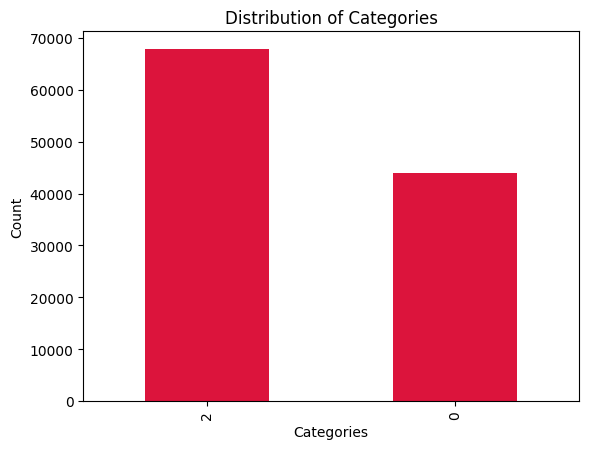

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_count = df['label'].value_counts()

# Create a bar plot
category_count.plot(kind='bar', color='crimson')
plt.title('Distribution of Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


#### 1.6 Undersampling approach

In [17]:
import pandas as pd

# Suppose you have a dataframe named df with a column 'class' representing the classes of interest

# Check the distribution of classes
class_distribution = df['label'].value_counts()

# Determine how many instances of each class you want to keep after undersampling
instances_per_class = len(df.loc[df['label']==0])

# Create a new dataframe to store the selected instances
new_dataframe = pd.DataFrame()

# Iterate over the classes
for class_label, group in df.groupby('label'):
    # If the group has fewer instances than desired, keep all instances
    if len(group) <= instances_per_class:
        new_dataframe = pd.concat([new_dataframe, group])
    else:
        # Otherwise, undersample randomly
        undersampled_instances = group.sample(instances_per_class, replace=False, random_state=42)
        new_dataframe = pd.concat([new_dataframe, undersampled_instances])

# Check the size of the new dataframe
print("Size of the new dataframe after undersampling:", len(new_dataframe))


Size of the new dataframe after undersampling: 87840


#### Data undersampled

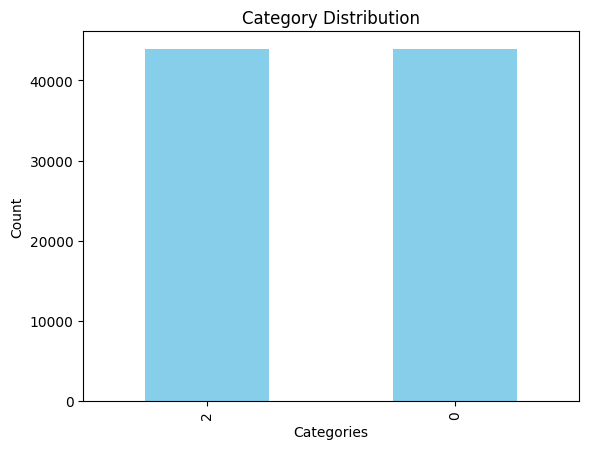

In [18]:
df = new_dataframe  # Assigning the new_dataframe to df
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_count = df['label'].value_counts()

# Create a bar plot
category_count.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


In [20]:
new_dataframe

,level_0,index,index_base_lotus,smiles,inchi,inchi2D,id,smiles2D,MaxEStateIndex,MinEStateIndex,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,7P2G,categoria,category,label
80667,80667,44714,67254,C=C1C(=O)O[C@@H]2[C@H]3[C@](C)(O)CC[C@@H](O)[C...,InChI=1S/C15H22O5/c1-7-10-8(16)6-14(2)9(17)4-5...,InChI=1S/C15H22O5/c1-7-10-8(16)6-14(2)9(17)4-5...,LTS0219889,C=C1C(=O)OC2C1C(O)CC1(C)C(O)CCC(C)(O)C21,11.780425,-1.025856,...,0,0,0,0,0,0,-6.3,Alta Afinidade,High Affinity,2
100227,100227,95396,143564,OC1=N[C@@H]2Cc3ccccc3-c3c4c(cc(c32)C1)OCO4,InChI=1S/C17H13NO3/c19-14-7-10-6-13-17(21-8-20...,InChI=1S/C17H13NO3/c19-14-7-10-6-13-17(21-8-20...,LTS0030442,OC1=NC2Cc3ccccc3-c3c4c(cc(c32)C1)OCO4,9.946893,-0.020231,...,0,0,0,0,0,0,-6.7,Alta Afinidade,High Affinity,2
8905,8905,78905,118755,CC(=O)O[C@@H]1[C@H](C(C)C)CC[C@@]2(CO)CC(=O)C=...,InChI=1S/C17H26O4/c1-10(2)14-5-6-17(9-18)8-13(...,InChI=1S/C17H26O4/c1-10(2)14-5-6-17(9-18)8-13(...,LTS0138822,CC(=O)OC1C(C(C)C)CCC2(CO)CC(=O)C=C(C)C12,11.941473,-0.456921,...,0,0,0,0,0,0,-5.2,Potencial,Potential,2
26958,26958,7791,7791,COC1=C(NCCS(=O)(=O)O)CC(O)(CO)CC1=O,"InChI=1S/C10H17NO7S/c1-18-9-7(11-2-3-19(15,16)...","InChI=1S/C10H17NO7S/c1-18-9-7(11-2-3-19(15,16)...",LTS0047513,COC1=C(NCCS(=O)(=O)O)CC(O)(CO)CC1=O,11.708694,-4.119699,...,0,0,0,0,0,0,-5.4,Potencial,Potential,2
83818,83818,48054,72295,C=CC(C)(Cl)C(Cl)C=CC(C)=CCC(O)C(=C)CC(=O)O,"InChI=1S/C16H22Cl2O3/c1-5-16(4,18)14(17)9-7-11...","InChI=1S/C16H22Cl2O3/c1-5-16(4,18)14(17)9-7-11...",LTS0225614,C=CC(C)(Cl)C(Cl)C=CC(C)=CCC(O)C(=C)CC(=O)O,10.518440,-1.004211,...,0,0,0,0,0,0,-5.3,Potencial,Potential,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111796,111796,117591,177030,COc1ccc2cc(C)cc(OC)c2c1OC,InChI=1S/C14H16O3/c1-9-7-10-5-6-11(15-2)14(17-...,InChI=1S/C14H16O3/c1-9-7-10-5-6-11(15-2)14(17-...,LTS0042176,COc1ccc2cc(C)cc(OC)c2c1OC,5.426862,0.710046,...,0,0,0,0,0,0,-4.8,Pouca Afinidade,Low Affinity,0
111798,111798,117593,177032,CC[C@H]1CN2CCc3cc(OC)c(O)cc3[C@@H]2C[C@@H]1C[C...,InChI=1S/C28H35N3O2/c1-3-17-16-31-11-9-18-14-2...,InChI=1S/C28H35N3O2/c1-3-17-16-31-11-9-18-14-2...,LTS0130657,CCC1CN2CCc3cc(OC)c(O)cc3C2CC1CC1NCCc2c1[nH]c1c...,10.502614,0.267527,...,0,0,0,0,0,0,-4.3,Pouca Afinidade,Low Affinity,0
111799,111799,117594,177033,CC1(C)C2CC=C(C=O)C1C2O,InChI=1S/C10H14O2/c1-10(2)7-4-3-6(5-11)8(10)9(...,InChI=1S/C10H14O2/c1-10(2)7-4-3-6(5-11)8(10)9(...,LTS0059821,CC1(C)C2CC=C(C=O)C1C2O,10.648889,-0.272963,...,0,0,0,0,0,0,-4.7,Pouca Afinidade,Low Affinity,0
111802,111802,117597,177037,CCCCCCCCCCCCCC=CC(=O)N1CCCCC1,InChI=1S/C21H39NO/c1-2-3-4-5-6-7-8-9-10-11-12-...,InChI=1S/C21H39NO/c1-2-3-4-5-6-7-8-9-10-11-12-...,LTS0061709,CCCCCCCCCCCCCC=CC(=O)N1CCCCC1,11.938568,0.229419,...,0,0,0,0,10,0,-4.5,Pouca Afinidade,Low Affinity,0


#### 1.6 - Defining chemical descriptors for pattern recognition.

In [30]:
numerical_columns = ['ExactMolWt',
 'MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_VSA8',
 'SMR_VSA9',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA12',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA5',
 'SlogP_VSA6',
 'SlogP_VSA7',
 'SlogP_VSA8',
 'SlogP_VSA9',
 'TPSA',
 'EState_VSA1',
 'EState_VSA10',
 'EState_VSA11',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'EState_VSA9',
 'VSA_EState1',
 'VSA_EState10',
 'VSA_EState2',
 'VSA_EState3',
 'VSA_EState4',
 'VSA_EState5',
 'VSA_EState6',
 'VSA_EState7',
 'VSA_EState8',
 'VSA_EState9',
 'FractionCSP3',
 'HeavyAtomCount',
 'NHOHCount',
 'NOCount',
 'NumAliphaticCarbocycles',
 'NumAliphaticHeterocycles',
 'NumAliphaticRings',
 'NumAromaticCarbocycles',
 'NumAromaticHeterocycles',
 'NumAromaticRings',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'NumRotatableBonds',
 'NumSaturatedCarbocycles',
 'NumSaturatedHeterocycles',
 'NumSaturatedRings',
 'RingCount',
 'MolLogP',
 'MolMR',
 'fr_Al_COO',
 'fr_Al_OH',
 'fr_Al_OH_noTert',
 'fr_ArN',
 'fr_Ar_COO',
 'fr_Ar_N',
 'fr_Ar_NH',
 'fr_Ar_OH',
 'fr_COO',
 'fr_COO2',
 'fr_C_O',
 'fr_C_O_noCOO',
 'fr_C_S',
 'fr_HOCCN',
 'fr_Imine',
 'fr_NH0',
 'fr_NH1',
 'fr_NH2',
 'fr_N_O',
 'fr_Ndealkylation1',
 'fr_Ndealkylation2',
 'fr_Nhpyrrole',
 'fr_SH',
 'fr_aldehyde',
 'fr_alkyl_carbamate',
 'fr_alkyl_halide',
 'fr_allylic_oxid',
 'fr_amide',
 'fr_amidine',
 'fr_aniline',
 'fr_aryl_methyl',
 'fr_azide',
 'fr_azo',
 'fr_barbitur',
 'fr_benzene',
 'fr_benzodiazepine',
 'fr_bicyclic',
 'fr_diazo',
 'fr_dihydropyridine',
 'fr_epoxide',
 'fr_ester',
 'fr_ether',
 'fr_furan',
 'fr_guanido',
 'fr_halogen',
 'fr_hdrzine',
 'fr_hdrzone',
 'fr_imidazole',
 'fr_imide',
 'fr_isocyan',
 'fr_isothiocyan',
 'fr_ketone',
 'fr_ketone_Topliss',
 'fr_lactam',
 'fr_lactone',
 'fr_methoxy',
 'fr_morpholine',
 'fr_nitrile',
 'fr_nitro',
 'fr_nitro_arom',
 'fr_nitro_arom_nonortho',
 'fr_nitroso',
 'fr_oxazole',
 'fr_oxime',
 'fr_para_hydroxylation',
 'fr_phenol',
 'fr_phenol_noOrthoHbond',
 'fr_phos_acid',
 'fr_phos_ester',
 'fr_piperdine',
 'fr_piperzine',
 'fr_priamide',
 'fr_prisulfonamd',
 'fr_pyridine',
 'fr_quatN',
 'fr_sulfide',
 'fr_sulfonamd',
 'fr_sulfone',
 'fr_term_acetylene',
 'fr_tetrazole',
 'fr_thiazole',
 'fr_thiocyan',
 'fr_thiophene',
 'fr_unbrch_alkane',
 'fr_urea']

In [31]:
len(numerical_columns)

208

In [32]:
df = new_dataframe

In [33]:
df.dropna(inplace=True)

In [34]:
X = df[numerical_columns]

In [35]:
len(X)

87821

In [36]:
y = df['label']

#### 1.7 - Train Test split

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [38]:
len(X_train)

70256

#### 1.8 - Data Preprocessing

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Pipeline for numerical data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputing missing values with mean
    ('robust_scaler', RobustScaler())  # Robust scaling for numerical features
])

# (name, transformer, columns)
preprocessed_pipeline = ColumnTransformer([
    ('numerical', num_pipeline, numerical_columns)  # Applying numerical pipeline to numerical columns
])


In [41]:
X_train = preprocessed_pipeline.fit_transform(X_train)
X_test = preprocessed_pipeline.fit_transform(X_test)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.dummy import DummyClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import f1_score

# # from lightgbm import LGBMClassifier  # assuming you have lightgbm installed

# # Selecionar algoritmos
# models = []
# models.append(('LR', LogisticRegression(solver='liblinear')))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
# models.append(('CART', DecisionTreeClassifier()))
# # models.append(('SVM', SVC(kernel='linear')))
# models.append(('RF', RandomForestClassifier(random_state=0)))  # random_state para algoritmos estocásticos
# models.append(('XGB', GradientBoostingClassifier(random_state=0)))
# models.append(('ADA', AdaBoostClassifier()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('QDA', QuadraticDiscriminantAnalysis()))
# models.append(('NB', GaussianNB()))
# models.append(('Dummy', DummyClassifier(strategy='most_frequent')))  # Um exemplo de Dummy Classifier

# # Avaliar cada modelo com validação cruzada (stratified 10-fold cross-validation)
# acc = []
# precision = []
# roc_auc = []
# names = []
# f1 = []
# for name, model in models:
#     kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#     acc_results = cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring='accuracy')
#     acc.append(acc_results)
#     names.append(name)
#     print(f'{name} Accuracy: {acc_results.mean():.2f} ({acc_results.std():.2f})')
#     print('----------------------------')


#### 1.9 Machine learning Model -  LGBM 

In [44]:
# pip install lightgbm

In [45]:
from lightgbm import LGBMClassifier

# Criar o classificador LGBM
lgbm = LGBMClassifier(random_state=0)

# Treinar o modelo
lgbm.fit(X_train, y_train.ravel())

# Fazer previsões
predictions_lgbm = lgbm.predict(X_test)


[LightGBM] [Info] Number of positive: 35113, number of negative: 35143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23793
[LightGBM] [Info] Number of data points in the train set: 70256, number of used features: 186
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499786 -> initscore=-0.000854
[LightGBM] [Info] Start training from score -0.000854


In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
confusion_rf = confusion_matrix(y_test, predictions_lgbm)
disp_et = ConfusionMatrixDisplay(confusion_matrix=confusion_rf, display_labels=['Inactive', 'Active'])

Classification report:
              precision    recall  f1-score   support

           0     0.8800    0.8533    0.8664      8762
           2     0.8583    0.8841    0.8710      8803

    accuracy                         0.8688     17565
   macro avg     0.8691    0.8687    0.8687     17565
weighted avg     0.8691    0.8688    0.8687     17565

Confusion matrix:


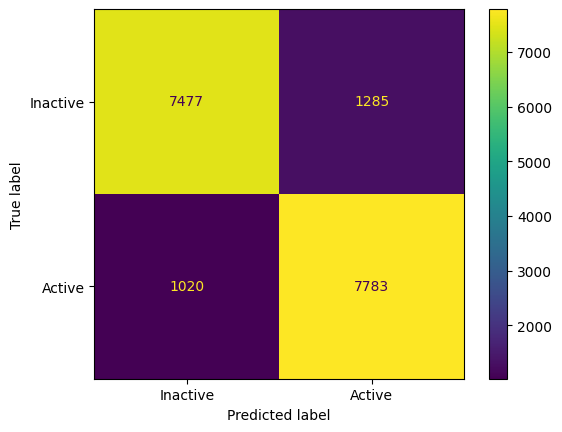

In [47]:
# # Avaliação da qualidade do modelo
# from sklearn.metrics import classification_report
# print("Classification report:")
# print(classification_report(y_test, predictions_lgbm, digits=4))

# print("Confusion matrix:")
# disp_et.plot()

# Avaliação da qualidade do modelo
from sklearn.metrics import classification_report
print("Classification report:")
print(classification_report(y_test, predictions_lgbm, digits=4))

print("Confusion matrix:")
disp_et.plot()

In [48]:
indexes = []
for i in range(len(y_test)):
    if (y_test.iloc[i] == 0) and (predictions_lgbm[i] == 2):
        indexes.append(y_test.index[i])
# print(indexes)

In [49]:
len(indexes)

1285

In [50]:
df.loc[indexes]['7P2G'].min()

-5.1

In [51]:
# # Ver estrutura dos inibidores de cruzaína classificados como inibidores de T. cruzi
# import rdkit
# from rdkit import Chem
# from rdkit.Chem import Draw

# ms = [Chem.MolFromSmiles(x) for x in df['smiles'][indexes]]
# img = Draw.MolsToGridImage(ms, molsPerRow=3, subImgSize=(300, 200), legends=[str (i) for i in indexes])
# img

### 2 - Testing of new molecules used in the treatment of COVID.

#### 2.1 - Descriptors list - RDKIT

In [52]:
from rdkit.Chem import Descriptors
descriptors_list = [x[0] for x in Descriptors._descList]

In [53]:
def calc_descriptors(df, num_vars):
    from rdkit import Chem    # make sure to import it if you haven't done so
    from rdkit.Chem import Descriptors 
    from rdkit.ML.Descriptors import MoleculeDescriptors
    df = df.copy()  # para não dar o SettingWithCopyWarning
    #     descriptor_list = ["FractionCSP3", "MolLogP", "MolWt", "NumAromaticRings", "NumHAcceptors", 
    #                        "NumHDonors", "NumRotatableBonds", "TPSA", "fr_azo", "LabuteASA"]  #  molecular surface area
    descriptors_list = [x[0] for x in Descriptors._descList]
#     descriptors_list = num_vars
    for desc in descriptors_list:
    #         descriptors_list = features_top30.index
        names = [desc]
        calc = MoleculeDescriptors.MolecularDescriptorCalculator(names)
        df[desc]  = df["Smiles"].apply(lambda x: calc.CalcDescriptors(Chem.MolFromSmiles(x))[0])
    return df

#### 2.2 - List of new molecules - literature review

In [54]:

import pandas as pd
testes_docking = pd.read_excel("new_molecules.xlsx")
testes_docking

,index,molecula,Smiles,7P2G
0,0,EGCG,C1[C@H]([C@H](OC2=CC(=CC(=C21)O)O)C3=CC(=C(C(=...,-5.6
1,1,caffeic acid,C1=CC(=C(C=C1/C=C/C(=O)O)O)O,-5.7
2,2,reveratrol,C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)O)O)O,-6.6
3,3,astragalus polysaccharide,O=[N+]([O-])C1=CC=C(C2=CSC(CCl)=N2)C=C1,-5.8
4,4,baicalin,C1=CC=C(C=C1)C2=CC(=O)C3=C(C(=C(C=C3O2)O[C@H]4...,-3.3
...,...,...,...,...
56,56,Rosmarinic acid,C1=CC(=C(C=C1C[C@H](C(=O)O)OC(=O)/C=C/C2=CC(=C...,-6.2
57,57,Safficinolide,CC(C)C1=C(C2=C(C(=C1)C=O)C3(CCCC(C3C(=O)O2)(C)...,-5.6
58,58,Sageone,CC(C)C1=C(C(=C2C(=C1)CCC3=C2C(=O)CCC3(C)C)O)O,-6.1
59,59,Ursolic acid,C[C@@H]1CC[C@@]2(CC[C@@]3(C(=CC[C@H]4[C@]3(CC[...,-1.6


In [55]:
# testes_docking['label']=2

def atribuir_valor(valor):
    if valor>(-5.8):
        return 0
    else:
        return 2
    
testes_docking['label'] = testes_docking['7P2G'].apply(atribuir_valor)
testes_docking

,index,molecula,Smiles,7P2G,label
0,0,EGCG,C1[C@H]([C@H](OC2=CC(=CC(=C21)O)O)C3=CC(=C(C(=...,-5.6,0
1,1,caffeic acid,C1=CC(=C(C=C1/C=C/C(=O)O)O)O,-5.7,0
2,2,reveratrol,C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)O)O)O,-6.6,2
3,3,astragalus polysaccharide,O=[N+]([O-])C1=CC=C(C2=CSC(CCl)=N2)C=C1,-5.8,2
4,4,baicalin,C1=CC=C(C=C1)C2=CC(=O)C3=C(C(=C(C=C3O2)O[C@H]4...,-3.3,0
...,...,...,...,...,...
56,56,Rosmarinic acid,C1=CC(=C(C=C1C[C@H](C(=O)O)OC(=O)/C=C/C2=CC(=C...,-6.2,2
57,57,Safficinolide,CC(C)C1=C(C2=C(C(=C1)C=O)C3(CCCC(C3C(=O)O2)(C)...,-5.6,0
58,58,Sageone,CC(C)C1=C(C(=C2C(=C1)CCC3=C2C(=O)CCC3(C)C)O)O,-6.1,2
59,59,Ursolic acid,C[C@@H]1CC[C@@]2(CC[C@@]3(C(=CC[C@H]4[C@]3(CC[...,-1.6,0


#### 2.3 - Calculation of descriptors for the new group of molecules.

In [56]:
anotacoes_descrip = calc_descriptors(testes_docking, descriptors_list)

C:\Users\Rafa\anaconda3\envs\principal\lib\site-packages\ipykernel_launcher.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [57]:
anotacoes_descrip

,index,molecula,Smiles,7P2G,label,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,EGCG,C1[C@H]([C@H](OC2=CC(=CC(=C21)O)O)C3=CC(=C(C(=...,-5.6,0,12.721634,-1.181149,12.721634,0.052570,0.211503,...,0,0,0,0,0,0,0,0,0,0
1,1,caffeic acid,C1=CC(=C(C=C1/C=C/C(=O)O)O)O,-5.7,0,10.125799,-1.062440,10.125799,0.229190,0.471621,...,0,0,0,0,0,0,0,0,0,0
2,2,reveratrol,C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)O)O)O,-6.6,2,9.300534,0.023478,9.300534,0.023478,0.692341,...,0,0,0,0,0,0,0,0,0,0
3,3,astragalus polysaccharide,O=[N+]([O-])C1=CC=C(C2=CSC(CCl)=N2)C=C1,-5.8,2,10.473714,-0.421608,10.473714,0.080136,0.478809,...,0,0,0,0,0,1,0,0,0,0
4,4,baicalin,C1=CC=C(C=C1)C2=CC(=O)C3=C(C(=C(C=C3O2)O[C@H]4...,-3.3,0,12.533593,-1.937588,12.533593,0.164423,0.299297,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,Rosmarinic acid,C1=CC(=C(C=C1C[C@H](C(=O)O)OC(=O)/C=C/C2=CC(=C...,-6.2,2,11.820732,-1.496006,11.820732,0.205604,0.297648,...,0,0,0,0,0,0,0,0,0,0
57,57,Safficinolide,CC(C)C1=C(C2=C(C(=C1)C=O)C3(CCCC(C3C(=O)O2)(C)...,-5.6,0,12.823432,-1.129316,12.823432,0.014491,0.515452,...,0,0,0,0,0,0,0,0,0,0
58,58,Sageone,CC(C)C1=C(C(=C2C(=C1)CCC3=C2C(=O)CCC3(C)C)O)O,-6.1,2,12.510741,-0.111620,12.510741,0.014175,0.759782,...,0,0,0,0,0,0,0,0,0,0
59,59,Ursolic acid,C[C@@H]1CC[C@@]2(CC[C@@]3(C(=CC[C@H]4[C@]3(CC[...,-1.6,0,12.794429,-0.557034,12.794429,0.030190,0.414109,...,0,0,0,0,0,0,0,0,0,0


#### 2.4 - Definition of label for new molecules

In [58]:
y_papers=anotacoes_descrip['label']

In [59]:
y_papers

0     0
1     0
2     2
3     2
4     0
     ..
56    2
57    0
58    2
59    0
60    2
Name: label, Length: 61, dtype: int64

In [60]:
X_teste_paper = preprocessed_pipeline.fit_transform(anotacoes_descrip)
X_teste_paper


array([[ 1.03869075,  0.2607095 , -1.02541992, ...,  0.        ,
         0.        ,  0.        ],
       [-1.25611154, -0.94762329, -0.84418835, ...,  0.        ,
         0.        ,  0.        ],
       [-0.85964716, -1.33177532,  0.81366689, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.26462605,  0.16254098,  0.60741432, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.02445719,  0.29459482, -0.07259193, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.95595941, -0.57581403, -6.65905175, ...,  0.        ,
         0.        ,  0.        ]])

In [61]:
predictions_rf_moleculas = lgbm.predict(X_teste_paper)
predictions_rf_moleculas

array([0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2], dtype=int64)

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
confusion_rf_paper = confusion_matrix(y_papers, predictions_rf_moleculas)
disp_et_paper = ConfusionMatrixDisplay(confusion_matrix=confusion_rf_paper, display_labels=['Inactive', 'Active'])

Classification report:
              precision    recall  f1-score   support

           0     0.7778    0.8077    0.7925        26
           2     0.8529    0.8286    0.8406        35

    accuracy                         0.8197        61
   macro avg     0.8154    0.8181    0.8165        61
weighted avg     0.8209    0.8197    0.8201        61

Confusion matrix:


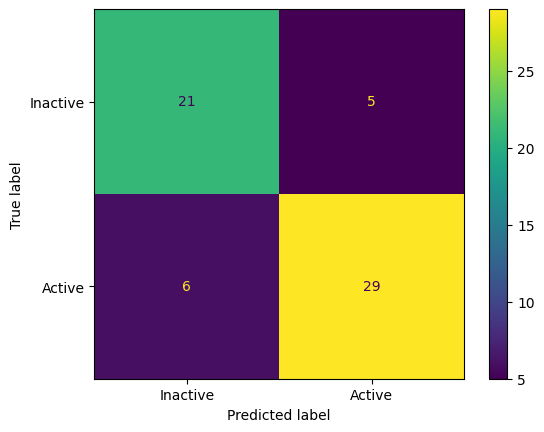

In [63]:
# Avaliação da qualidade do modelo
from sklearn.metrics import classification_report
print("Classification report:")
print(classification_report(y_papers, predictions_rf_moleculas, digits=4))

print("Confusion matrix:")
disp_et_paper.plot()

#### 2.5 - Preliminar Analysis

There are 11 molecules that were incorrectly classified:

5 were originally **inactive** but classified as **active** by the model (False Positives

6 were originally **active** but classified as **inactive** by the model (False Negatives).

#### 2.6 - False Positive group originally inactive but classified as active by the model (False Positives)

In [64]:
indexes = []
for i in range(len(y_papers)):
    if (y_papers.iloc[i] == 0) and (predictions_rf_moleculas[i] == 2):
        indexes.append(y_papers.index[i])
print(indexes)

[19, 23, 25, 52, 57]


In [65]:
len(indexes)

5

In [66]:
df_analises = testes_docking.loc[indexes]
df_analises

,index,molecula,Smiles,7P2G,label
19,19,7b- hydroxydeoxycryptojaponol,CC(C)C1=C(C(=C2C(=C1)[C@H](C[C@@H]3[C@@]2(CCCC...,-5.3,0
23,23,bavachinin,CC(=CCC1=CC2=C(C=C1OC)O[C@@H](CC2=O)C3=CC=C(C=...,-4.3,0
25,25,isobavachalcone,CC(=CCC1=C(C=CC(=C1O)C(=O)/C=C/C2=CC=C(C=C2)O)O)C,-5.3,0
52,52,Glabridin,CC1(C=CC2=C(O1)C=CC3=C2OC[C@H](C3)C4=C(C=C(C=C...,-5.2,0
57,57,Safficinolide,CC(C)C1=C(C2=C(C(=C1)C=O)C3(CCCC(C3C(=O)O2)(C)...,-5.6,0


In [67]:
print(df_analises['7P2G'].mean()+std)
print(df_analises['7P2G'].mean()-std)

-4.799999999999999
-5.479999999999999


#### 2.7 - False Negative Group (originally active but classified as inactive)

In [68]:
indexes1 = []
for i in range(len(y_papers)):
    if (y_papers.iloc[i] == 2) and (predictions_rf_moleculas[i] == 0):
        indexes1.append(y_papers.index[i])
print(indexes1)

[3, 17, 26, 28, 30, 51]


In [69]:
df_analises_FN = testes_docking.loc[indexes1]
df_analises_FN

,index,molecula,Smiles,7P2G,label
3,3,astragalus polysaccharide,O=[N+]([O-])C1=CC=C(C2=CSC(CCl)=N2)C=C1,-5.8,2
17,17,parthenolide,C/C/1=C\CC[C@@]2([C@H](O2)[C@@H]3[C@@H](CC1)C(...,-6.4,2
26,26,4’-O-methylbavachalcone,CC(=CCC1=CC(=C(C=C1OC)O)C(=O)/C=C/C2=CC=C(C=C2...,-6.2,2
28,28,corylifol,CC(=CCC/C(=C/CC1=C(C=CC(=C1)C2=COC3=C(C2=O)C=C...,-6.6,2
30,30,quercetin-3-b-D-glucoside,O=c1c(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,-6.2,2
51,51,Coriandrin,CC1=CC2=CC3=C(C=CO3)C(=C2C(=O)O1)OC,-6.0,2


In [70]:
print(df_analises_FN['7P2G'].mean()+std)
print(df_analises_FN['7P2G'].mean()-std)

-5.86
-6.54


### saving molecules 

In [71]:
# df_analises.to_csv('falsos_positivos.csv', index=False)
# df_analises_FN.to_csv('falsos_negativos.csv', index=False)

### 2.8 - False Positive Molecules - visualization

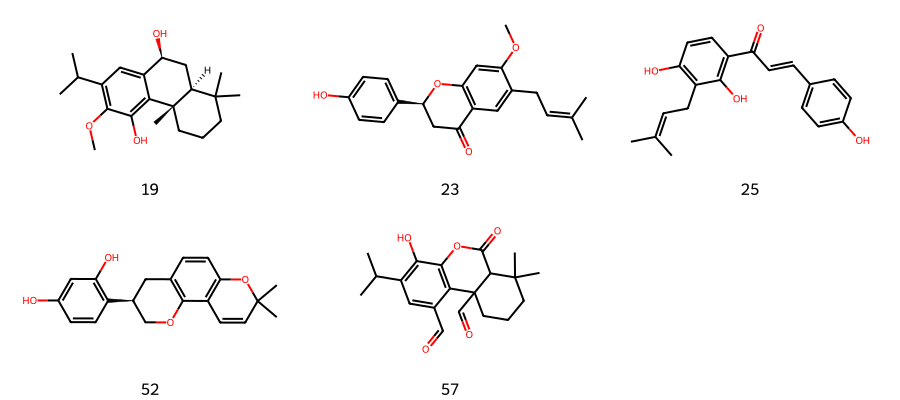

In [73]:

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw

ms = [Chem.MolFromSmiles(x) for x in df_analises['Smiles'][indexes]]
img = Draw.MolsToGridImage(ms, molsPerRow=3, subImgSize=(300, 200), legends=[str (i) for i in indexes])
img

#### 2.8 - False Negative Molecules - visualization

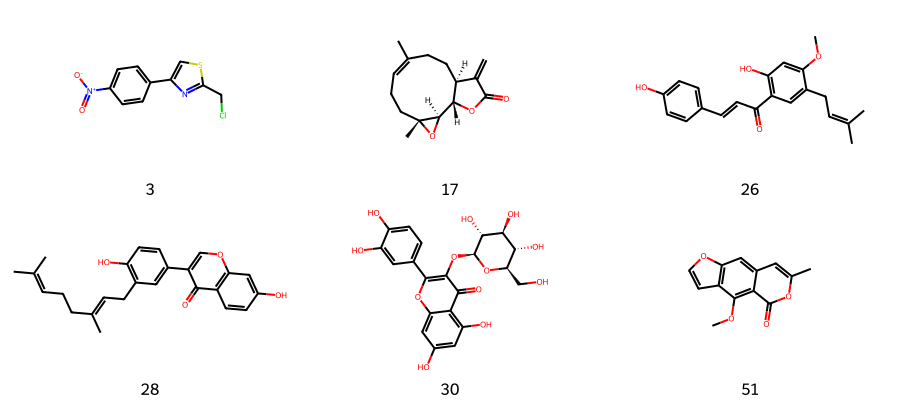

In [74]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw

ms = [Chem.MolFromSmiles(x) for x in df_analises_FN['Smiles'][indexes1]]
img = Draw.MolsToGridImage(ms, molsPerRow=3, subImgSize=(300, 200), legends=[str (i) for i in indexes1])
img